# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people, one group follows the first diet and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.


**Null hypothesis** = THERE INS'T significant differences in average weight loss between people who followed the first diet and those who followed the second diet

**Alternative hypothesis** = THERE IS significant differences in average weight loss between people who followed the first diet and those who followed the second diet

In [25]:
# TODO
import numpy as np
import scipy.stats as stats

#Diets data lists

diet1_sample = np.array([2.0, 2.5, 3, 2.8, 2.3, 2.7, 2.5])
diet2_sample = np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3, 3.2])

#Calculate Students t-test and P-valor

t_statistic, p_value = stats.ttest_ind(diet1_sample, diet2_sample)

print(f"T-estadístico: {t_statistic:.8f}")
print(f"P-value: {p_value:.8f}")


T-estadístico: -3.53834080
P-value: 0.00408327


Null hypothesis is rejected and Alternative hypothesis is accepted. THERE ISN'T significant differences in average weight loss between people who followed the first diet and those who followed the second diet

Students t-test is negative, so it's suggest that there are significant differences between the means of the two diets.
P-value is under 0.05, that indicates the differences aren't random and they statistically significants.


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically are:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

### Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

**Null Hypothesis** = THERE ISN'T significant differences in average corn yield between the three types of fertilizers

**Alternative Hypothesis** = THERE IS significant differences in average corn yield between the three types of fertilizers

In [19]:
# TODO
from scipy.stats import f_oneway

fer1 = np.array([20, 21, 20, 19, 20])
fer2 = np.array([22, 21, 23, 22, 21])
fer3 = np.array([24, 23, 22, 23, 24])

anova_statistic, p_value = f_oneway(fer1, fer2, fer3)

print(f"ANOVA test: {anova_statistic:.5f}")
print(f"P-value: {p_value:.5f}")

ANOVA test: 20.31579
P-value: 0.00014


**Alternative hypothesis** is accepted, there are significant differences in average corn yield between the three types of fertilizers

**ANOVA test** = 20.31579, this big result suggest that at least one of the means for the three fertilizers are differents.

**P-value**= 0.00014, under 0.05, clearly acceptable p-value for the acceptance of the alternative hypothesis.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  fer1   fer2      1.8 0.0099 0.4572 3.1428   True
  fer1   fer3      3.2 0.0001 1.8572 4.5428   True
  fer2   fer3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


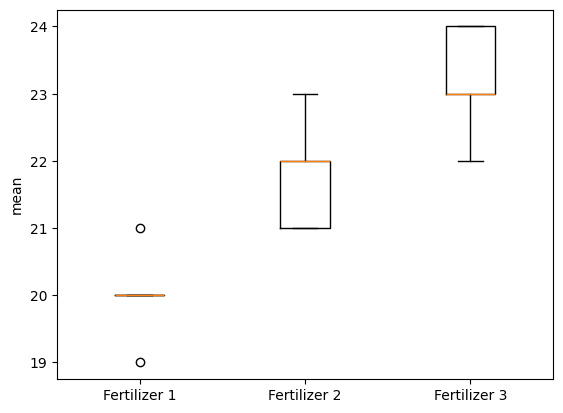

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import pandas as pd 

fer1 = np.array([20, 21, 20, 19, 20])
fer2 = np.array([22, 21, 23, 22, 21])
fer3 = np.array([24, 23, 22, 23, 24])

df = pd.DataFrame({
    'score': np.concatenate([fer1, fer2, fer3]),
    'group': np.repeat(['fer1', 'fer2', 'fer3'], repeats=len(fer1))
})

tukey_results = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey_results.summary())

fig, ax = plt.subplots(1, 1)
ax.boxplot([fer1, fer2, fer3])
ax.set_xticklabels(["Fertilizer 1", "Fertilizer 2", "Fertilizer 3"]) 
ax.set_ylabel("mean") 
plt.show()

We can interpretate from this table: fertilizer 1 mean is smaller than fertilizazer 2 mean and fertilizazer 2 mean is smaller than fertilizazer 3 mean, so the best fertilizazer is the number 3, as we can see it is the one that produce the most quantity of corn.